**Task 2:- MOVIE RATING PREDICTION WITH PYTHON**

By **Vishwajit Singh**

August Batch 2 

Aim:- Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.

Dataset info:- Dataset containing Movies , ratings, users dataset data and this dataset is taken from Kaggle as mention in pdf.


Importing Image from Url by using necessary library:-

In [1]:
from IPython.display import Image
Image(url="https://image.freepik.com/free-vector/clapper-board-with-video-filmstrips-video-camera-horn_24640-3858.jpg")

**Importing all necessary libraries for Exploratory Data Anaylsis:-**

In [2]:
# Importing required libraries for analysis the dataset
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset:-**

In [3]:
movies_dataset = pd.read_csv('G:/VS_Code/CODSOFT_Tasks/Movie_Rating_Prediction/movies.csv')        # reading csv file by using pandas
movies_dataset.head()       # by using head it reads first 5 rows of dataset 

,MovieIDs,MovieName,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies_dataset.tail()       # by usnig tail it reads last 5 rows of dataset 

,MovieIDs,MovieName,Genre
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [7]:
movies_dataset.describe()      # Check the descriptive statistics of numeric variables

,MovieIDs
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [9]:
movies_dataset.shape         # Check the number of rows and columns

(3883, 3)

In [10]:
movies_dataset.columns.values 

array(['MovieIDs', 'MovieName', 'Genre'], dtype=object)

In [11]:
movies_dataset.dtypes

MovieIDs      int64
MovieName    object
Genre        object
dtype: object

In [12]:
movies_dataset.info(verbose = True)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MovieIDs   3883 non-null   int64 
 1   MovieName  3883 non-null   object
 2   Genre      3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [13]:
movies_dataset.isnull().sum()

MovieIDs     0
MovieName    0
Genre        0
dtype: int64

In [17]:
movies_dataset.dropna(inplace=True)

In [18]:
movies_dataset.isna().sum()

MovieIDs     0
MovieName    0
Genre        0
dtype: int64

In [19]:
ratings_dataset = pd.read_csv('G:/VS_Code/CODSOFT_Tasks/Movie_Rating_Prediction/ratings.csv')        # reading csv file by usnig pandas
ratings_dataset.head()       # by using head it reads first 5 rows of dataset 

,UserId,MovieID,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [29]:
ratings_dataset.tail()       # by usnig tail it reads last 5 rows of dataset 

,UserId,MovieID,Ratings,Timestamp
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


In [30]:
ratings_dataset.describe()      # Check the descriptive statistics of numeric variables

,UserId,MovieID,Ratings,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [31]:
ratings_dataset.shape         # Check the number of rows and columns

(1000209, 4)

In [32]:
ratings_dataset.columns.values 

array(['UserId', 'MovieID', 'Ratings', 'Timestamp'], dtype=object)

In [33]:
ratings_dataset.dtypes

UserId       int64
MovieID      int64
Ratings      int64
Timestamp    int64
dtype: object

In [34]:
ratings_dataset.info(verbose = True)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserId     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Ratings    1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [35]:
ratings_dataset.isnull().sum()

UserId       0
MovieID      0
Ratings      0
Timestamp    0
dtype: int64

In [36]:
ratings_dataset.dropna(inplace=True)

In [37]:
ratings_dataset.isna().sum()

UserId       0
MovieID      0
Ratings      0
Timestamp    0
dtype: int64

In [38]:
users_dataset = pd.read_csv('G:/VS_Code/CODSOFT_Tasks/Movie_Rating_Prediction/users.csv')        # reading csv file by usnig pandas
users_dataset.head()       # by using head it reads first 5 rows of dataset

,UserId,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [39]:
users_dataset.tail()       # by usnig tail it reads last 5 rows of dataset 

,UserId,Gender,Age,Occupation,Zip-code
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


In [40]:
users_dataset.describe()      # Check the descriptive statistics of numeric variables

,UserId,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [41]:
users_dataset.shape         # Check the number of rows and columns

(6040, 5)

In [42]:
users_dataset.columns.values

array(['UserId', 'Gender', 'Age', 'Occupation', 'Zip-code'], dtype=object)

In [43]:
users_dataset.dtypes

UserId         int64
Gender        object
Age            int64
Occupation     int64
Zip-code      object
dtype: object

In [44]:
users_dataset.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserId      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [45]:
users_dataset.isnull().sum()

UserId        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [46]:
users_dataset.dropna(inplace=True)

In [48]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
users_dataset['Gender'] = labelencoder.fit_transform(users_dataset['Gender'])
users_dataset.head()

,UserId,Gender,Age,Occupation,Zip-code
0,1,0,1,10,48067
1,2,1,56,16,70072
2,3,1,25,15,55117
3,4,1,45,7,02460
4,5,1,25,20,55455


In [49]:
users_dataset.isna().sum()

UserId        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [50]:
dataframe = pd.concat([movies_dataset, ratings_dataset,users_dataset], axis=1)
dataframe.head()

,MovieIDs,MovieName,Genre,UserId,MovieID,Ratings,Timestamp,UserId,Gender,Age,Occupation,Zip-code
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,0.0,1.0,10.0,48067
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,1.0,56.0,16.0,70072
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,1.0,25.0,15.0,55117
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,1.0,45.0,7.0,02460
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,1.0,25.0,20.0,55455


In [51]:
dataframe.isnull().sum()

MovieIDs      996326
MovieName     996326
Genre         996326
UserId             0
MovieID            0
Ratings            0
Timestamp          0
UserId        994169
Gender        994169
Age           994169
Occupation    994169
Zip-code      994169
dtype: int64

In [56]:
dataframe.dropna()

,MovieIDs,MovieName,Genre,UserId,MovieID,Ratings,Timestamp,UserId,Gender,Age,Occupation,Zip-code
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,0.0,1.0,10.0,48067
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,1.0,56.0,16.0,70072
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,1.0,25.0,15.0,55117
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,1.0,45.0,7.0,02460
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,1.0,25.0,20.0,55455
...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948.0,Meet the Parents (2000),Comedy,28,334,4,978125960,3879.0,1.0,25.0,3.0,83687
3879,3949.0,Requiem for a Dream (2000),Drama,28,266,2,978982323,3880.0,1.0,25.0,7.0,54942
3880,3950.0,Tigerland (2000),Drama,28,2174,3,978126491,3881.0,1.0,18.0,2.0,44515
3881,3951.0,Two Family House (2000),Drama,28,912,5,978985294,3882.0,1.0,56.0,14.0,55337


In [91]:
dataframe.isna().sum()

MovieIDs      0
MovieName     0
Genre         0
UserId        0
MovieID       0
Ratings       0
Timestamp     0
UserId        0
Gender        0
Age           0
Occupation    0
Zip-code      0
age_group     0
dtype: int64

In [111]:
dataset = dataframe.drop(['Occupation','Zip-code','Timestamp'], axis =1)

In [112]:
dataset.head()

,MovieIDs,MovieName,Genre,UserId,MovieID,Ratings,UserId,Gender,Age,age_group
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,1.0,0.0,1.0,0-9
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,1.0,56.0,50-59
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,1.0,25.0,20-29
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,1.0,45.0,40-49
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,1.0,25.0,20-29


In [114]:
dataset.describe()

,MovieIDs,UserId,MovieID,Ratings,UserId,Gender,Age
count,3883.000000,3883.000000,3883.000000,3883.000000,3883.000000,3883.00000,3883.000000
mean,1986.049446,16.146794,1802.371362,3.561937,1942.000000,0.72856,30.429307
std,1146.778349,7.471676,1079.587203,1.095616,1121.069876,0.44476,13.062302
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000
25%,982.500000,10.000000,923.500000,3.000000,971.500000,0.00000,25.000000
50%,2010.000000,18.000000,1722.000000,4.000000,1942.000000,1.00000,25.000000
75%,2980.500000,23.000000,2692.000000,4.000000,2912.500000,1.00000,35.000000
max,3952.000000,28.000000,3952.000000,5.000000,3883.000000,1.00000,56.000000


In [115]:
dataset.isna().sum()

MovieIDs     0
MovieName    0
Genre        0
UserId       0
MovieID      0
Ratings      0
UserId       0
Gender       0
Age          0
age_group    0
dtype: int64

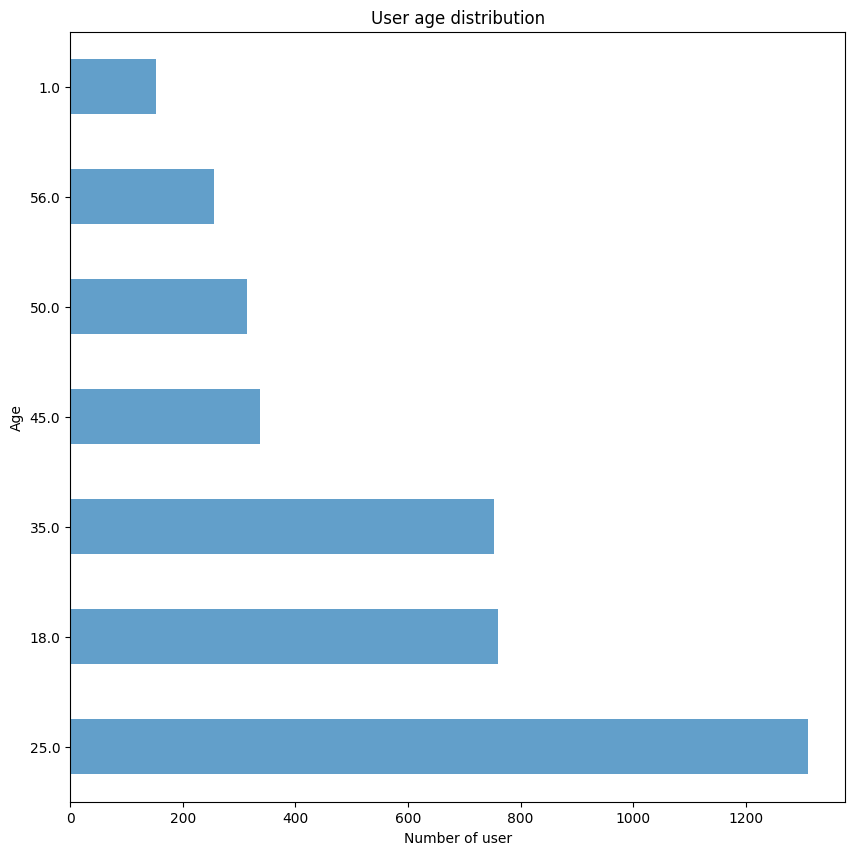

In [117]:
#Visualize user age distribution
dataframe['Age'].value_counts().plot(kind='barh',alpha=0.7,figsize=(10,10))
plt.xlabel('Number of user')
plt.title('User age distribution')
plt.show()

In [119]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
dataframe['age_group'] = pd.cut(dataframe.Age, range(0, 81, 10), right=False, labels=labels)
dataframe[['Age', 'age_group']].drop_duplicates()[:10]

,Age,age_group
0,1.0,0-9
1,56.0,50-59
2,25.0,20-29
3,45.0,40-49
5,50.0,50-59
6,35.0,30-39
17,18.0,10-19


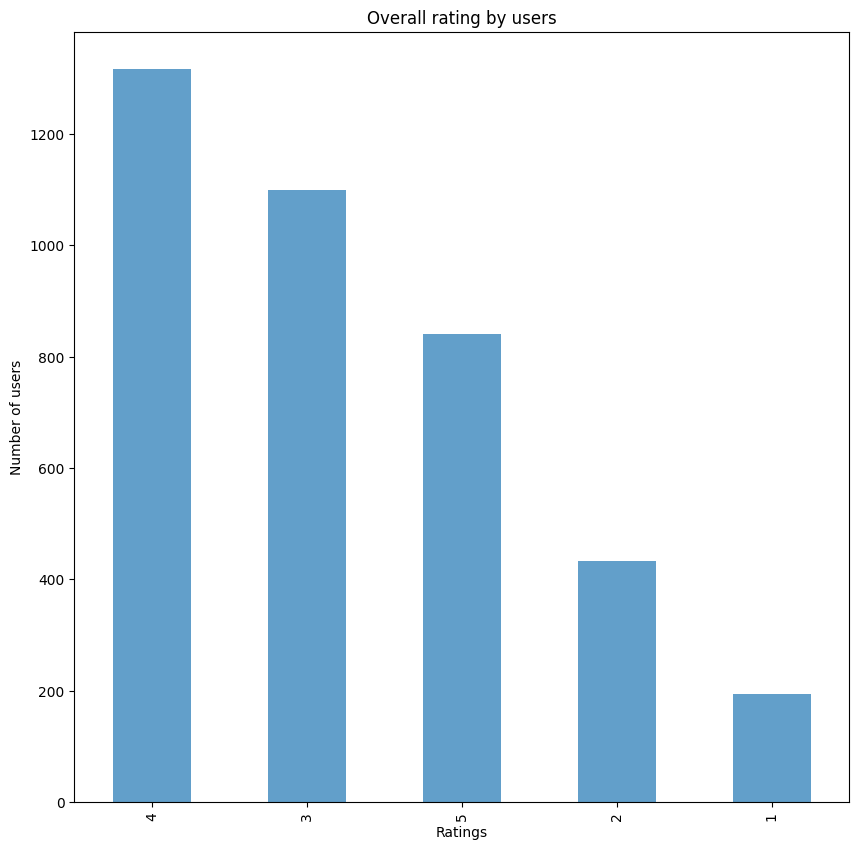

In [120]:
#Visualize overall rating by users
dataframe['Ratings'].value_counts().plot(kind='bar',alpha=0.7,figsize=(10,10))
plt.ylabel('Number of users')
plt.title('Overall rating by users')
plt.show()

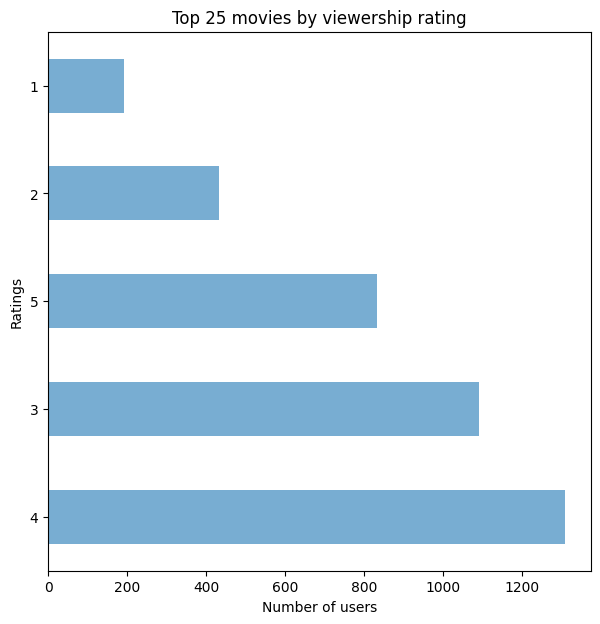

In [121]:
#Find and visualize the top 25 movies by viewership rating
top_25 = dataframe[25:]
top_25['Ratings'].value_counts().plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.xlabel('Number of users')
plt.title('Top 25 movies by viewership rating')
plt.show()

Text(0.5, 1.0, 'Overall ratings by gender')

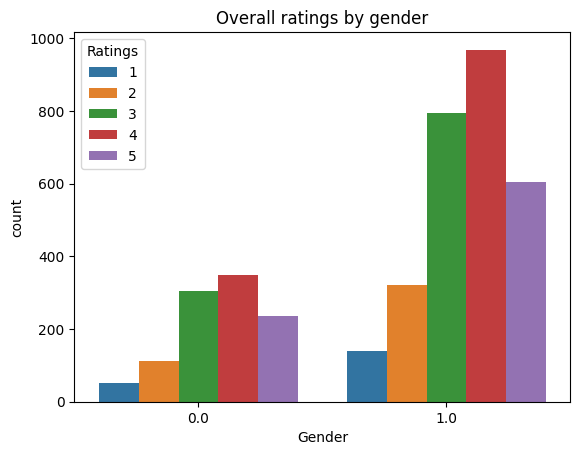

In [140]:
sns.countplot(x=dataset['Gender'],hue=dataset['Ratings'])
plt.title('Overall ratings by gender')

Text(0.5, 1.0, 'Overall ratings by age group')

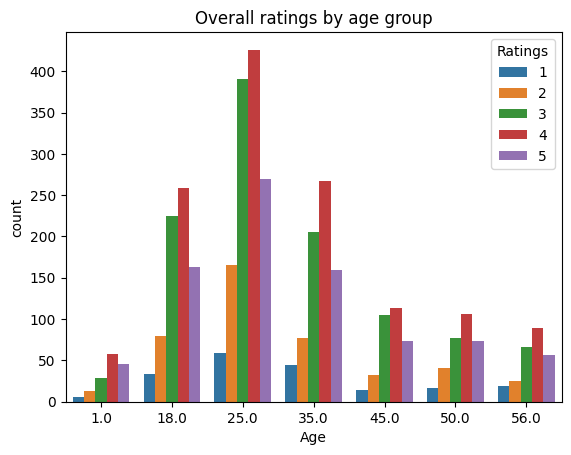

In [148]:
sns.countplot(x=dataset['Age'],hue=dataset['Ratings'])
plt.title('Overall ratings by age group')

Text(0.5, 0, 'Ratings')

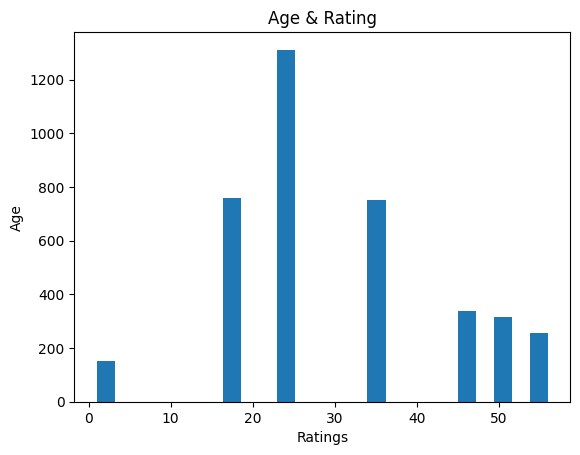

In [175]:
#Create a histogram for age
dataframe.Age.plot.hist(bins=25)
plt.title("Age & Rating")
plt.ylabel('Age')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

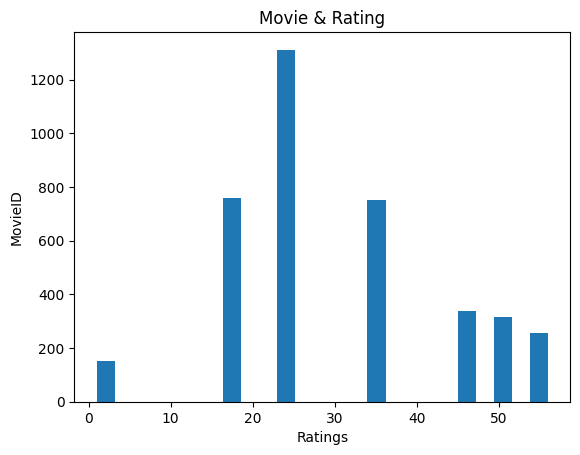

In [177]:
#Create a histogram for movie
dataframe.Age.plot.hist(bins=25)
plt.title("Movie & Rating")
plt.ylabel('MovieID')
plt.xlabel('Ratings')

In [122]:
#First 500 extracted records
first_500 = dataframe[500:]
first_500.dropna(inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_15784\74761406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_500.dropna(inplace=True)


In [156]:
#Use the following features:movie id,age,occupation
features = first_500[['Occupation','Age','Ratings']].values

In [157]:
#Use rating as label
labels = first_500[['Ratings']].values

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [159]:
#Create train and test data set
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

In [162]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


86.89

In [163]:
# Support Vector Machines

svc = SVC()
svc.fit(train, train_labels)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_labels) * 100, 2)
acc_svc

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


67.48

In [164]:
# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


98.1

In [165]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(train, train_labels)
Y_pred = linear_svc.predict(test)
acc_linear_svc = round(linear_svc.score(train, train_labels) * 100, 2)
acc_linear_svc

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


60.99

In [166]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

100.0

In [167]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


100.0

In [168]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
5,Decision Tree,100.00
1,KNN,98.10
2,Logistic Regression,86.89
0,Support Vector Machines,67.48
4,Linear SVC,60.99


In [174]:
decision_tree.predict(train)

array([3, 3, 2, ..., 4, 3, 5], dtype=int64)

In [178]:
print(train_labels)

[[3]
 [3]
 [2]
 ...
 [4]
 [3]
 [5]]
